<a href="https://colab.research.google.com/github/amurkhon/MachineLearning-projects/blob/main/CML_for_portifilo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import imblearn

In [ ]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/blob/main/diabetes.csv?raw=true")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap="PuBu")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
df.corrwith(df['Outcome']).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [ ]:
x = df.drop("Outcome", axis=1)
y = df['Outcome'].copy()

In [ ]:
#from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(random_state=42)
#x_ros, y_ros = ros.fit_resample(x, y) # fit predictor and target variable


from imblearn.under_sampling import TomekLinks

tl = RandomOverSampler(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = ros.fit_resample(x, y)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x_ros = scaler.fit_transform(x_ros)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_tl = scaler.fit_transform(x_tl)


In [ ]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x_ros,y_ros, test_size=0.20, random_state=12)
#from xgboost import XGBClassifier
#xgb_model = XGBClassifier()
#xgb_model.fit(x_train, y_train)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_tl,y_tl, test_size=0.20, random_state=12)

from xgboost import XGBClassifier
xgb_model = XGBClassifier()

xgb_model.fit(x_train, y_train)

XGBClassifier()

In [ ]:
y_predict = xgb_model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print('Classification Report: \n', classification_report(y_test,y_predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        92
           1       0.83      0.82      0.83       108

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.82      0.81      0.82       200



In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,y_predict)

0.7063492063492064

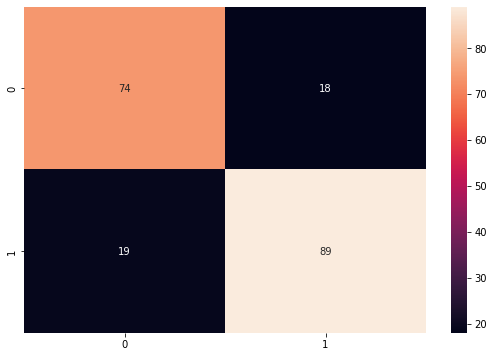

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(9,6))
sns.heatmap(confusion_matrix(y_test,y_predict), annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator=xgb_model, X=x_tl,y=y_tl, cv=5)

from sklearn.metrics import classification_report
print('Classification Report: \n', classification_report(y_tl,predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.76      0.79       500
           1       0.78      0.85      0.81       500

    accuracy                           0.80      1000
   macro avg       0.81      0.80      0.80      1000
weighted avg       0.81      0.80      0.80      1000

